In [101]:
import requests
import datetime
import time
import json
import os
import seaborn as sns
import pandas as pd
import pickle
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
boundbox = [-124.409591,36.4701132878 ,-114.131211,	42.009518]
fallbirds = ("Bald Eagle",
              "Oak Titmouse",
              "Golden Eagle",
              "Varied thrush",
              "Ferruginous hawk",
              "Whimbrel",
              "Golden-crowned sparrow",
              "Red-tailed Hawk",
              "American Kestrel")
springbirds = ("Pintails",
                #"White-fronted Geese",
                #"Snow Geese",
                "Grebes",
                "White pelicans",
                "Great egret",
                "Snowy egret",
                "Great Blue heron",
                "Green heron",
                "American Bittern",
                "Peregrine Falcon",
                "Common loon",
                "Pacific loon",
                "Allen's Hummingbird")
otherbirds = ("Dark-eyed Junco",
               "California Towhee",
               "Cedar Waxwing",
               "California Scrub-Jay",
               "Cooper's Hawk",
               "Yellow-rumped Warbler",
               "Chestnut-backed Chickadee",
               "Red-shouldered Hawk",
               "Common nighthawk",
               #"Black swift",
               "Anna's Hummingbird",
               "American coot",
               "Sora",
               "American oystercatcher",
               #"Common Snipe",
               "Barn Owl",
               "Northern flicker",
               "American crow",
               "Common raven",
               "California Quail",
               "Oregon Junco",
               "Steller's Jay",
               "Rock Pigeon",
               "Killdeer",
               "Elegant tern",
               "Pelagic cormorant",
               "Hooded merganser",
               "Willet")


In [122]:
name = "Oak%20Titmouse"
start_dt = datetime.date(2019, 1, 1)
end_dt = datetime.date(2019, 12, 31)
nelat = 42.009518
nelng = -114.131211
swlat = 36.4701132878
swlng = -124.409591

In [44]:
all_dates_2019 = []
for i in range(365):
    all_dates_2019.append(start_dt + datetime.timedelta(days=i))

In [123]:
start_dt = str(all_dates_2019[0])
end_dt = str(all_dates_2019[0])
url_format = f"https://api.inaturalist.org/v1/observations?taxon_name={name}&d1={start_dt}&d2={end_dt}&nelat={nelat}&nelng={nelng}&swlat={swlat}&swlng={swlng}&order=desc&order_by=created_at"

In [124]:
response = requests.get(url_format)

In [125]:
response.text

'{"total_results":3,"page":1,"per_page":30,"results":[{"quality_grade":"research","time_observed_at":"2019-01-01T13:47:00-08:00","taxon_geoprivacy":"open","annotations":[],"uuid":"452e329f-aa21-4cc9-81d1-7bdadd3aebfd","observed_on_details":{"date":"2019-01-01","week":1,"month":1,"hour":13,"year":2019,"day":1},"id":19365582,"cached_votes_total":0,"identifications_most_agree":true,"created_at_details":{"date":"2019-01-01","week":1,"month":1,"hour":17,"year":2019,"day":1},"species_guess":"Oak Titmouse","identifications_most_disagree":false,"tags":[],"positional_accuracy":1849,"comments_count":0,"site_id":1,"created_time_zone":"America/Los_Angeles","license_code":"cc-by-nc","observed_time_zone":"America/Los_Angeles","quality_metrics":[],"public_positional_accuracy":1849,"reviewed_by":[10201,564321],"oauth_application_id":null,"flags":[],"created_at":"2019-01-01T17:15:56-08:00","description":null,"time_zone_offset":"-08:00","project_ids_with_curator_id":[],"observed_on":"2019-01-01","observ

In [58]:
json.loads(response.text)['total_results']

3

In [72]:
start_time = time.time()
all_relevant_data = []
for i in range(0, 365, 7):
    start_dt = str(all_dates_2019[i])
    end_dt = str(all_dates_2019[i] + datetime.timedelta(days=6))
    name = "Bald%20Eagle"
    url_format = f"https://api.inaturalist.org/v1/observations?taxon_name={name}&d1={start_dt}&d2={end_dt}&nelat={nelat}&nelng={nelng}&swlat={swlat}&swlng={swlng}&order=desc&order_by=created_at&only_id=true"
    response = requests.get(url_format)
    try:
        response_dict = json.loads(response.text)
        all_relevant_data.append((name, i%7, response_dict['total_results']))
    except:
        break

stop_time = time.time()
print(f"The total time elapsed is: {(stop_time - start_time):.10f} seconds.")

The total time elapsed is: 13.2564558983 seconds.


In [73]:
all_relevant_data

[('Bald%20Eagle', 0, 16),
 ('Bald%20Eagle', 0, 13),
 ('Bald%20Eagle', 0, 7),
 ('Bald%20Eagle', 0, 21),
 ('Bald%20Eagle', 0, 8),
 ('Bald%20Eagle', 0, 8),
 ('Bald%20Eagle', 0, 19),
 ('Bald%20Eagle', 0, 7),
 ('Bald%20Eagle', 0, 5),
 ('Bald%20Eagle', 0, 8),
 ('Bald%20Eagle', 0, 9),
 ('Bald%20Eagle', 0, 4),
 ('Bald%20Eagle', 0, 11),
 ('Bald%20Eagle', 0, 8),
 ('Bald%20Eagle', 0, 9),
 ('Bald%20Eagle', 0, 8),
 ('Bald%20Eagle', 0, 17),
 ('Bald%20Eagle', 0, 9),
 ('Bald%20Eagle', 0, 9),
 ('Bald%20Eagle', 0, 7),
 ('Bald%20Eagle', 0, 8),
 ('Bald%20Eagle', 0, 6),
 ('Bald%20Eagle', 0, 2),
 ('Bald%20Eagle', 0, 11),
 ('Bald%20Eagle', 0, 6),
 ('Bald%20Eagle', 0, 10),
 ('Bald%20Eagle', 0, 14),
 ('Bald%20Eagle', 0, 2),
 ('Bald%20Eagle', 0, 6),
 ('Bald%20Eagle', 0, 5),
 ('Bald%20Eagle', 0, 5),
 ('Bald%20Eagle', 0, 5),
 ('Bald%20Eagle', 0, 2),
 ('Bald%20Eagle', 0, 10),
 ('Bald%20Eagle', 0, 8),
 ('Bald%20Eagle', 0, 6),
 ('Bald%20Eagle', 0, 2),
 ('Bald%20Eagle', 0, 4),
 ('Bald%20Eagle', 0, 6),
 ('Bald%20Eagle

## Pulling data for all

In [74]:
time.sleep(10)

In [75]:
birds_to_pull = [
    ("fall-birds", "Bald Eagle",)
    ,("fall-birds", "Oak Titmouse",)
    ,("fall-birds", "Golden Eagle",)
    ,("fall-birds", "Varied thrush",)
    ,("fall-birds", "Ferruginous hawk",)
    ,("fall-birds", "Whimbrel",)
    ,("fall-birds", "Golden-crowned sparrow",)
    ,("fall-birds", "Red-tailed Hawk",)
    ,("fall-birds", "American Kestrel")
    ,("spring-birds", "Pintails",)
    ,("spring-birds", "Grebes",)
    ,("spring-birds", "White pelicans",)
    ,("spring-birds", "Great egret",)
    ,("spring-birds", "Snowy egret",)
    ,("spring-birds", "Great Blue heron",)
    ,("spring-birds", "Green heron",)
    ,("spring-birds", "American Bittern",)
    ,("spring-birds", "Peregrine Falcon",)
    ,("spring-birds", "Common loon",)
    ,("spring-birds", "Pacific loon",)
    ,("spring-birds", "Allen's Hummingbird")
    
]

In [77]:
"I DEV".replace(' ','%20')

'I%20DEV'

In [81]:
all_relevant_data = []
for bird in birds_to_pull:
    time.sleep(55)
    for i in range(0, 365, 7):
        start_dt = str(all_dates_2019[i])
        end_dt = str(all_dates_2019[i] + datetime.timedelta(days=6))
        name = bird[1].replace(' ', '%20')
        url_format = f"https://api.inaturalist.org/v1/observations?taxon_name={name}&d1={start_dt}&d2={end_dt}&nelat={nelat}&nelng={nelng}&swlat={swlat}&swlng={swlng}&order=desc&order_by=created_at&only_id=true"
        response = requests.get(url_format)
        try:
            response_dict = json.loads(response.text)
            all_relevant_data.append((bird[0], bird[1], i%7, response_dict['total_results']))
        except:
            break

In [82]:
import pickle

In [83]:
with open('all_relevant_data.pickle', 'wb') as f:
    pickle.dump(all_relevant_data, f)

In [84]:
import pandas as pd

In [85]:
df = pd.DataFrame()

In [86]:
df['bird_type'] = [x[0] for x in all_relevant_data]
df['bird_name'] = [x[1] for x in all_relevant_data]
df['week'] = [x[2] for x in all_relevant_data]
df['observations'] = [x[3] for x in all_relevant_data]

In [88]:
df['bird_name'].value_counts()

Bald Eagle                53
White pelicans            53
Pacific loon              53
Common loon               53
Peregrine Falcon          53
American Bittern          53
Green heron               53
Great Blue heron          53
Snowy egret               53
Great egret               53
Grebes                    53
Oak Titmouse              53
Pintails                  53
American Kestrel          53
Red-tailed Hawk           53
Golden-crowned sparrow    53
Whimbrel                  53
Ferruginous hawk          53
Varied thrush             53
Golden Eagle              53
Allen's Hummingbird       53
Name: bird_name, dtype: int64

In [89]:
df['week'] =  [x for x in range(1,54)]*21

In [90]:
df

,bird_type,bird_name,week,observations
0,fall-birds,Bald Eagle,1,16
1,fall-birds,Bald Eagle,2,13
2,fall-birds,Bald Eagle,3,7
3,fall-birds,Bald Eagle,4,21
4,fall-birds,Bald Eagle,5,8
...,...,...,...,...
1108,spring-birds,Allen's Hummingbird,49,0
1109,spring-birds,Allen's Hummingbird,50,0
1110,spring-birds,Allen's Hummingbird,51,0
1111,spring-birds,Allen's Hummingbird,52,0


In [91]:
df.groupby('bird_name').sum()

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_98982/3311328026.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('bird_name').sum()


,week,observations
bird_name,,
Allen's Hummingbird,1431,359
American Bittern,1431,83
American Kestrel,1431,824
Bald Eagle,1431,469
Common loon,1431,299
Ferruginous hawk,1431,135
Golden Eagle,1431,223
Golden-crowned sparrow,1431,1377
Great Blue heron,1431,2273


In [93]:
import seaborn as sns

<Axes: xlabel='week', ylabel='observations'>

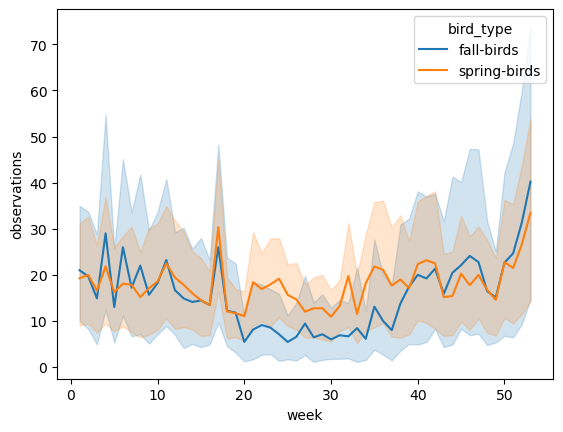

In [95]:
sns.lineplot(data=df , x='week', y ='observations', hue='bird_type')

<Axes: xlabel='week', ylabel='observations'>

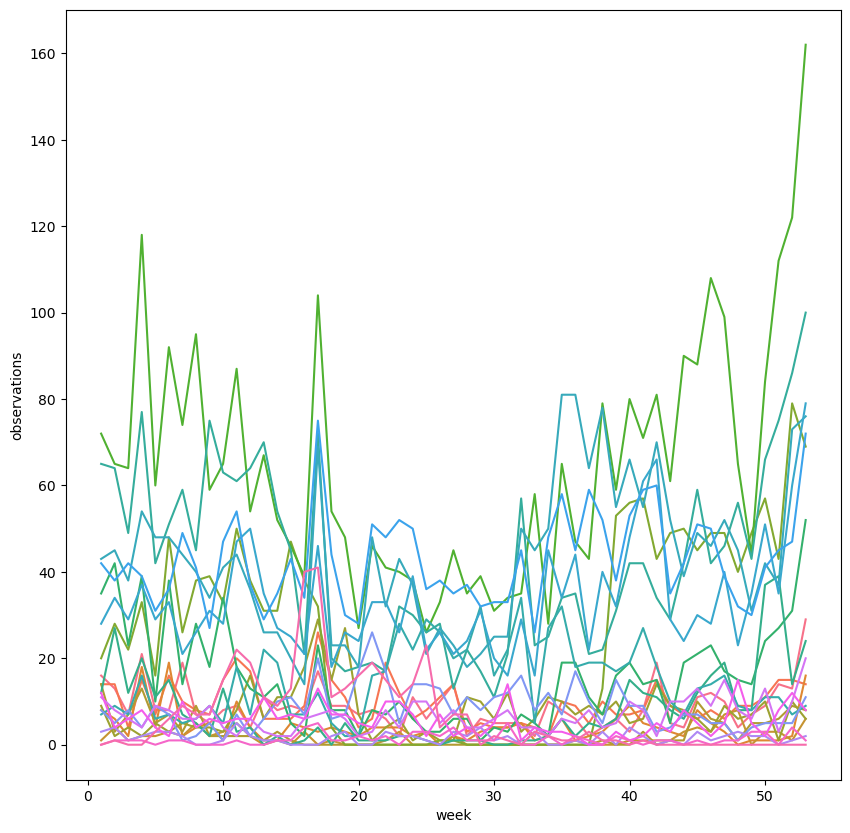

In [103]:
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=df , x='week', y ='observations', hue='bird_name', legend=None)

In [104]:
pca = PCA(n_components=10)

In [107]:
df_trend = df.pivot_table(index='bird_name', columns='week', values='observations')

In [108]:
pca.fit(df_trend.values)

PCA(n_components=10)

In [109]:
pca.explained_variance_ratio_

array([0.84116108, 0.06862846, 0.02140796, 0.01985099, 0.01539579,
       0.00838509, 0.00613922, 0.00446928, 0.00325224, 0.00254474])

In [118]:
df_eig = pd.DataFrame(data=pca.components_.T, index=range(1,54), columns=[f"$\phi_{x}$" for x in range(1,11)])

In [119]:
df_eig

,$\phi_1$,$\phi_2$,$\phi_3$,$\phi_4$,$\phi_5$,$\phi_6$,$\phi_7$,$\phi_8$,$\phi_9$,$\phi_10$
1,0.136934,0.045572,0.194239,-0.186903,-0.093837,-0.088603,0.026996,0.053662,0.034939,-0.289137
2,0.136649,0.077928,0.115282,-0.159736,-0.222513,-0.056580,0.178249,0.315598,0.044120,0.098252
3,0.128814,0.014399,0.075906,-0.080973,-0.051150,0.003974,0.021607,0.122613,0.082304,-0.187454
4,0.197356,0.131994,0.141000,-0.317152,-0.000036,0.088238,-0.000472,-0.136305,-0.243211,0.142811
5,0.117636,-0.029886,0.005967,-0.095217,-0.053027,-0.092620,0.034239,-0.146271,0.080014,0.025482
6,0.158757,0.137760,-0.068026,-0.122695,0.051943,-0.080574,0.021610,0.135524,-0.360656,0.104546
7,0.145387,0.019049,0.154762,-0.040530,0.057498,-0.124588,-0.130788,0.033789,0.180585,-0.128145
8,0.159395,0.097823,-0.008435,-0.108476,0.198184,-0.027165,-0.090205,0.036352,-0.172917,-0.030648
9,0.134085,0.120406,0.201788,0.121193,-0.208202,-0.094386,-0.102264,-0.142156,-0.106610,-0.027494
10,0.141646,0.062727,0.171451,0.006423,-0.058454,-0.196350,0.047957,0.353363,0.002222,0.097038


<Axes: >

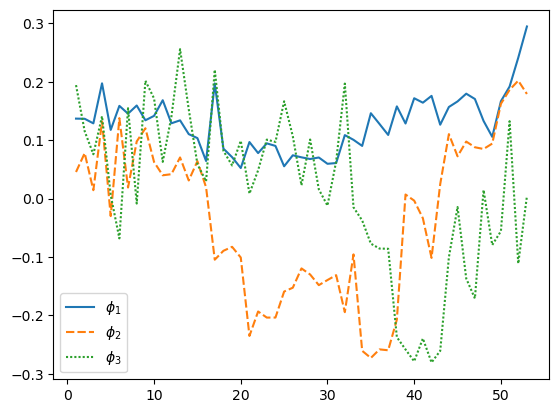

In [126]:
sns.lineplot(data=df_eig.iloc[:, 0:3])